# 04-04-분류용 데이터 세트를 준비합니다.
## 유방암 데이터셋
||의학|이진 분류|값|
|:---:|:---|:---|:---|
|좋음|양성 종양(정상 종양)|음성 샘플 | (0)|
|나쁨|악성 종양|양성 샘플|(1)|


# 데이터 세트 준비하기

In [44]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(type(cancer))

<class 'sklearn.utils.Bunch'>


In [45]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [46]:
print(cancer.data[:3])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]


# 박스 플롯 그려서 데이터 파악하기

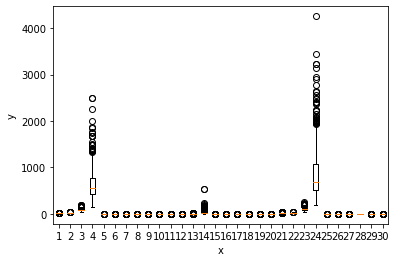

In [47]:
import matplotlib.pyplot as plt
plt.boxplot(cancer.data)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 데이터 특성 확인하기

In [48]:
print(cancer.feature_names[[3,13,23]]) # 3, 13, 23의 특성 이름을 출력

['mean area' 'area error' 'worst area']


# 타깃 데이터 확인하고 훈련 데이터 준비하기

In [49]:
import numpy as np
np.unique(cancer.target, return_counts=True)
# (array([0, 1])) -> target값은 0과 1로 이루어짐
# (array([212, 357])) -> 0의 개수 : 212, 1의 개수 357

(array([0, 1]), array([212, 357]))

# 훈련 데이터 세트 저장하기

In [50]:
x = cancer.data
y = cancer.target

# 04-05 로지스틱 회귀를 위한 뉴런을 만듭니다.
- 일반화 성능을 평가하기 위해 훈련 세트와 테스트로 나눕니다.

- ### 훈련 데이터 세트를 훈련 세트와 테스트 세트로 나누는 규칙
    - 훈련 데이터 세트를 나눌 때는 테스트 세트보다 훈련 세트가 더 많아야 합니다.
    - 훈련 데이터 세트를 나누기 전에 양성, 음성 클래스가 훈련 세트나 테스트 세트의 어느 한쪽에 몰리지 않도록 골고루 섞어야 합니다.


# 훈련 세트와 테스트 세트 나눈기

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)
print(np.unique(y_train, return_counts=True))

(455, 30) (114, 30)
(array([0, 1]), array([170, 285]))


# 로지스틱 뉴런 구현하기

In [52]:
# np.sum 확인
import numpy as np
a = np.array([1,2,3])
b = np.array([3,4,5])
print('a + b = ', a+b) # 같은 열의 값을 더함
print('a * b = ', a*b) # 같은 열의 값을 곱함
print('np.sum(a * b) = ', np.sum(a*b)) # 행렬의 모든 값을 더함

import numpy as np
x = np.array([[1,2,3,4],
     [5,6,7,8],
     [9,10,11,12]])
w = np.array([10,20,30,40])
print(x*w)
print(np.sum(x*w))

a + b =  [4 6 8]
a * b =  [ 3  8 15]
np.sum(a * b) =  26
[[ 10  40  90 160]
 [ 50 120 210 320]
 [ 90 200 330 480]]
2100


In [53]:
import numpy as np
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b     # 직선의 방정식을 계산
        # z = w1*x1 + w2*x2 ''' wn*xn + b
        return z
    
    def backprop(self, x, err):
        # 가중치와 절편에 대한 그레이디언트를 계산, 반환
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])        # 가중치를 초기화 합니다.
        self.b = 0                          # 절편을 초기화 합니다.
        for i in range(epochs):             # epochs만큼 반복합니다.
            for x_i, y_i in zip(x, y):      # 모든 샘플에 대해 반복합니다.
                z = self.forpass(x_i)       # 정방향 계산
                a = self.activiation(z)     # 활성화 함수 적용
                err = -(y_i - a)            # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= w_grad            # 가중치 업데이트
                self.b -= b_grad            # 절편 업데이트
    
    def activiation(self, z):
        z = np.clip(z, -100, None)          # 안전한 np.exp() 계산을 위한 clip함수
        a = 1 / (1 + np.exp(-z))            # 시그모이드 계산
        return a
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 선형 함수 적용
        a = self.activiation(np.array(z))       # 활성화 함수 적용
        return a > 0.5                          # 계단 함수 적용

# 모델 훈련하고 결과 확인하기

In [54]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

In [55]:
np.mean(neuron.predict(x_test) == y_test) # x_test에 대해 예측한 값이 y_test와 같은 것에 대한 평균

0.8245614035087719